# Rodar algortimos de Machine Learning

In [20]:
# Libs
import pandas as pd

# Importa Classes de objetos
from analise_qualidade_vinhos.etl.extract import extract_csv_processed, extract_model
from analise_qualidade_vinhos.models.pipelines.pipeline_classification import pipeline_classification
from analise_qualidade_vinhos.models.pipelines.pipeline_regression import pipeline_regression
from analise_qualidade_vinhos.models.evaluation.cross_validation import avaliar_cross_validation, avaliar_modelo, executar_random_search
from analise_qualidade_vinhos.models.classification.param_distributions import get_classification_param_distributions
from analise_qualidade_vinhos.visualization.plot_roc import plot_roc_curve

#### Extrair dados para o uso do modelo

In [22]:
input_path = 'modelo_ml.csv'

df = extract_csv_processed(input_path)
df_reg = df.copy()
df

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,ph,sulfitos,alcool,qualidade,target
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [23]:
df.drop('qualidade', axis=1, inplace=True)

#### Prepação para uso do pipeline de classificação e regressão

In [10]:
bins =[2.5, 7.0, 8.5]
labels = [0, 1]

bins_1 = [2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]
labels_1 = [0, 1, 2, 3, 4, 5]

In [ ]:
# catagorizando as coluna qualidade para 3 categoria 0 = Qualidade Baixa, 1 = Qualidade média, 2 = Qualidade Alta
df['target'] = pd.cut(
    df['qualidade'],
    bins=bins,
    labels= labels,
    include_lowest=True,
    right=True
)
df.drop('qualidade', axis=1, inplace=True)
df.sort_values('target', ascending=False)

In [13]:
df.sort_values('target', ascending=False)

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,ph,sulfitos,alcool,target
4085,7.581506,0.368579,0.402937,3.361130,0.073488,16.725175,43.635290,0.996630,3.369906,0.854692,12.892894,1
3634,8.586914,0.343825,0.500134,3.383892,0.077074,13.610736,35.765098,0.997516,3.284396,0.853825,12.336912,1
3641,9.094980,0.400201,0.498896,1.800000,0.070970,6.989960,15.959841,0.994625,3.211406,0.690000,12.491968,1
3640,10.617613,0.346831,0.531901,2.612675,0.070634,5.063375,16.063375,0.997149,3.150000,0.667111,11.044362,1
3639,8.882271,0.410591,0.408818,1.907532,0.068269,5.865585,12.537659,0.995434,3.323117,0.684623,11.605910,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1375,7.200000,0.560000,0.260000,2.000000,0.083000,13.000000,100.000000,0.995860,3.260000,0.520000,9.900000,0
1376,8.200000,0.885000,0.200000,1.400000,0.086000,7.000000,31.000000,0.994600,3.110000,0.460000,10.000000,0
1377,5.200000,0.490000,0.260000,2.300000,0.090000,23.000000,74.000000,0.995300,3.685000,0.620000,12.200000,0
1378,7.200000,0.450000,0.150000,2.000000,0.078000,10.000000,28.000000,0.996090,3.290000,0.510000,9.900000,0


### **Modelo de Classificação**

In [24]:
# Base Line de Classificação
results_tree = pipeline_classification(
    data_path = df,
    target_column = 'target',
    model_name = 'tree_classifier',
    custom_params =None,
    scale_type='standard',
    test_size=0.3,
    return_data=True,
    avarage='weighted',
    save=True
)

Iniciando pipeline de classificação com modelo: tree_classifier
Modelo tree_classifier criado com sucesso!
Iniciando predição do pipeline de classificação com modelo: tree_classifier

Métricas:
  Accuracy: 0.8792
  Precision: 0.8838
  Recall: 0.8792
  F1-score: 0.8813
  Confusion Matrix:
    [381, 32]
    [26, 41]
Salvando arquivo treinado de classificação do modelo: tree_classifier
✅ Modelo salvo em: ../models_storage\tree_classifier_model.pkl
✅ Modelo salvo em: ../models_storage\tree_classifier_scaler.pkl


##### O nosso modelo base a ***arvore de classificação*** já nos retornou um valor muito satisfatório com mostrado acima, rodarei outros modelos a partir de base e farei validações para garamtirmos que não nosso dados não estão tendo overfitting, prejudicando assim nossas predições dos dados.

In [25]:
# Logistic Regression
results_lr = pipeline_classification(
    data_path = df,
    target_column = 'target',
    model_name = 'logistic_regression',
    custom_params =None,
    scale_type='minmax',
    test_size=0.3,
    return_data=True,
    avarage='weighted',
    save=None
)

Iniciando pipeline de classificação com modelo: logistic_regression
Modelo logistic_regression criado com sucesso!
Iniciando predição do pipeline de classificação com modelo: logistic_regression

Métricas:
  Accuracy: 0.8646
  Precision: 0.8373
  Recall: 0.8646
  F1-score: 0.8417
  Confusion Matrix:
    [399, 14]
    [51, 16]
Salvando arquivo treinado de classificação do modelo: logistic_regression


##### Regressão Logistica teve um performance menor que nosso modelo base

In [26]:
results_xgb = pipeline_classification(
    data_path = df,
    target_column = 'target',
    model_name = 'xgboost',
    custom_params =None,
    scale_type='minmax',
    test_size=0.3,
    return_data=True,
    avarage='weighted',
    save=True
)

Iniciando pipeline de classificação com modelo: xgboost
Modelo xgboost criado com sucesso!
Iniciando predição do pipeline de classificação com modelo: xgboost

Métricas:
  Accuracy: 0.8958
  Precision: 0.8873
  Recall: 0.8958
  F1-score: 0.8898
  Confusion Matrix:
    [396, 17]
    [33, 34]
Salvando arquivo treinado de classificação do modelo: xgboost
✅ Modelo salvo em: ../models_storage\xgboost_model.pkl
✅ Modelo salvo em: ../models_storage\xgboost_scaler.pkl


In [27]:
# Lightgbm
results_lgm = pipeline_classification(
    data_path = df,
    target_column = 'target',
    model_name = 'lightgbm',
    custom_params =None,
    scale_type='minmax',
    test_size=0.2,
    return_data=True,
    avarage='weighted',
    save=True
)

Iniciando pipeline de classificação com modelo: lightgbm
Modelo lightgbm criado com sucesso!
Iniciando predição do pipeline de classificação com modelo: lightgbm

Métricas:
  Accuracy: 0.9156
  Precision: 0.9108
  Recall: 0.9156
  F1-score: 0.9118
  Confusion Matrix:
    [264, 9]
    [18, 29]
Salvando arquivo treinado de classificação do modelo: lightgbm
✅ Modelo salvo em: ../models_storage\lightgbm_model.pkl
✅ Modelo salvo em: ../models_storage\lightgbm_scaler.pkl


h:\Portifolios_e_anotacoes_Jackson\PORTIFÓLIOS\analise-qualidade-vinhos\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
h:\Portifolios_e_anotacoes_Jackson\PORTIFÓLIOS\analise-qualidade-vinhos\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [28]:
# Random Forest
results_rf = pipeline_classification(
    data_path = df,
    target_column = 'target',
    model_name = 'random_forest',
    custom_params =None,
    scale_type='minmax',
    test_size=0.3,
    return_data=True,
    avarage='weighted',
    save=True
)

Iniciando pipeline de classificação com modelo: random_forest
Modelo random_forest criado com sucesso!
Iniciando predição do pipeline de classificação com modelo: random_forest

Métricas:
  Accuracy: 0.8896
  Precision: 0.8806
  Recall: 0.8896
  F1-score: 0.8836
  Confusion Matrix:
    [394, 19]
    [34, 33]
Salvando arquivo treinado de classificação do modelo: random_forest
✅ Modelo salvo em: ../models_storage\random_forest_model.pkl
✅ Modelo salvo em: ../models_storage\random_forest_scaler.pkl


In [29]:
# catboost
results_cat = pipeline_classification(
    data_path = df,
    target_column = 'target',
    model_name = 'catboost',
    custom_params =None,
    scale_type='standard',
    test_size=0.3,
    return_data=True,
    avarage='weighted',
    save=None
)

Iniciando pipeline de classificação com modelo: catboost
Modelo catboost criado com sucesso!
Iniciando predição do pipeline de classificação com modelo: catboost

Métricas:
  Accuracy: 0.8708
  Precision: 0.8514
  Recall: 0.8708
  F1-score: 0.8559
  Confusion Matrix:
    [396, 17]
    [45, 22]
Salvando arquivo treinado de classificação do modelo: catboost


In [30]:
# SVM
results_svc = pipeline_classification(
    data_path = df,
    target_column = 'target',
    model_name = 'svm_classifier',
    custom_params =None,
    scale_type='minmax',
    test_size=0.2,
    return_data=True,
    avarage='weighted',
    save=None
)

Iniciando pipeline de classificação com modelo: svm_classifier
Modelo svm_classifier criado com sucesso!
[LibSVM]Iniciando predição do pipeline de classificação com modelo: svm_classifier


AttributeError: This 'SVC' has no attribute 'predict_proba'

## O modelo base que utilizei foi o tree classification com um resultado de 77% a partir dai rodeis outros modelos para buscar o melhor resultado final
## Todos nossos modelos ficaram acima dos 75% de F1-score ótimo resultado para nossas predições, agora irei fazer as validações necessárias para que possamos descartar overfitting.
## O modelo com melhor performance foi o lightgbm com 87% de F1-score então sera com ele que irei fazer as validações.

# Validações do modelo de Classificação

In [31]:
# Desempacotando o resultado do pipeline treinado e testado
model_lgm, X_train, X_test, y_train, y_test =  results_lgm['train_model']

In [32]:
display(X_test)

array([[0.4       , 0.49162011, 0.08743169, ..., 0.41447368, 0.49253731,
        0.23529412],
       [0.41290323, 0.42458101, 0.18579235, ..., 0.61184211, 0.2238806 ,
        0.21568627],
       [0.78709677, 0.61452514, 0.24043716, ..., 0.46710526, 0.97014925,
        0.29411765],
       ...,
       [0.47741935, 0.53631285, 0.27322404, ..., 0.29605263, 0.29850746,
        0.2745098 ],
       [0.54193548, 0.16759777, 0.42622951, ..., 0.29605263, 0.53731343,
        0.54901961],
       [0.58064516, 0.72067039, 0.04371585, ..., 0.48026316, 0.31343284,
        0.25490196]], shape=(320, 11))

In [33]:
# Pega disctribuição dinâmica de parâmetros
model_name = 'lightgbm'
param_grid_rfc = get_classification_param_distributions(model_name)

In [34]:
# Roda RandomSearch fazendo a validação cruzada
busca = executar_random_search(model_lgm, param_grid_rfc, X_train, y_train, cv=10)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


h:\Portifolios_e_anotacoes_Jackson\PORTIFÓLIOS\analise-qualidade-vinhos\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "h:\Portifolios_e_anotacoes_Jackson\PORTIFÓLIOS\analise-qualidade-vinhos\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "h:\Portifolios_e_anotacoes_Jackson\PORTIFÓLIOS\analise-qualidade-vinhos\.venv\Lib\site-packages\lightgbm\sklearn.py", line 1560, in fit
    super().fit(
  File "h:\Portifolios_e_anotacoes_Jackson


Validação Cruzada (f1_weighted):
Scores por fold: [0.86021364 0.9117606  0.86669616 0.90909384 0.90874074]
Média: 0.8913
Desvio Padrão: 0.0229
Melhor: 0.9118
Pior: 0.8602


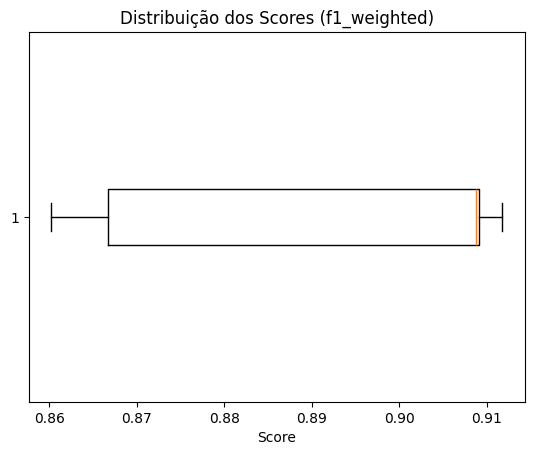

In [35]:
# Roda o RandomSearch após efetuar a validação cruzada
avaliar_cross_validation(busca, X_train, y_train, cv=5)

### 1º teste foi a validação cruzada com randomsearch que faz testes com blocos separados mantendo uma generização nos dados, e obtivemos um resultado satisfatório com um média dos Scores por fold de 0.85 e desvio padrão baixo de 0.0122.

Melhores parâmetros: {'learning_rate': np.float64(0.2996896099223678), 'max_depth': 0, 'n_estimators': 299, 'num_leaves': 28, 'subsample': np.float64(0.5159662522202142)}
Acurácia: 0.9
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       273
           1       0.68      0.60      0.64        47

    accuracy                           0.90       320
   macro avg       0.81      0.77      0.79       320
weighted avg       0.90      0.90      0.90       320



h:\Portifolios_e_anotacoes_Jackson\PORTIFÓLIOS\analise-qualidade-vinhos\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


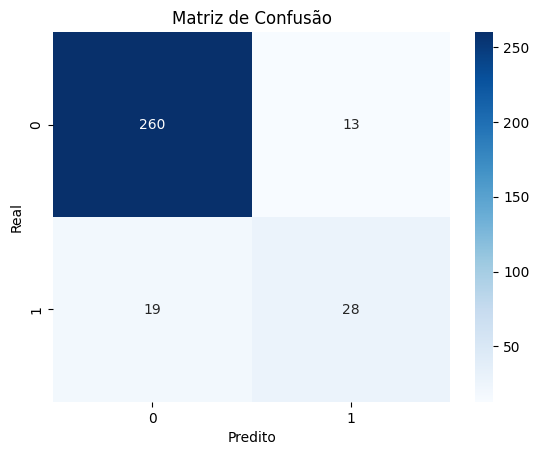

In [36]:
# Avalia o teste com a validação cruzada
avaliar_modelo(busca, X_test, y_test)

### Obtemos uma ótima acuracia de 0.955, utilizando os dados cruzados com randosearch

Melhores parâmetros: não aplicável (modelo não passou por busca de hiperparâmetros)
Acurácia: 0.915625
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       273
           1       0.76      0.62      0.68        47

    accuracy                           0.92       320
   macro avg       0.85      0.79      0.82       320
weighted avg       0.91      0.92      0.91       320



h:\Portifolios_e_anotacoes_Jackson\PORTIFÓLIOS\analise-qualidade-vinhos\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


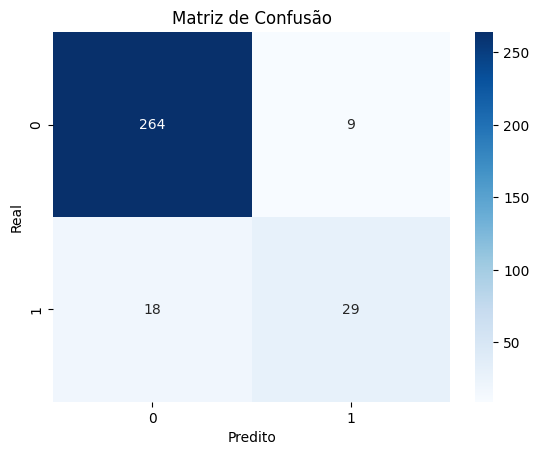

In [37]:
# Avalia o teste com a validação
avaliar_modelo(model_lgm, X_test, y_test)

### Obtemos a mesma acuracia de 0.955, utilizando o modelo sem cruzar os dados

In [38]:
train_score = model_lgm.score(X_train, y_train)
test_score = model_lgm.score(X_test, y_test)
print(f'Treino: {train_score:.4f} | Teste: {test_score:.4f}')

Treino: 1.0000 | Teste: 0.9156


h:\Portifolios_e_anotacoes_Jackson\PORTIFÓLIOS\analise-qualidade-vinhos\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
h:\Portifolios_e_anotacoes_Jackson\PORTIFÓLIOS\analise-qualidade-vinhos\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


### Mesmo o treino dando overfitting com 1.0 o Teste nos mostra que nosso modelo está generalizando os dados, isso é ótimo e nos ajuda com mais confirmação que ele não irá overfitar com dados novos.

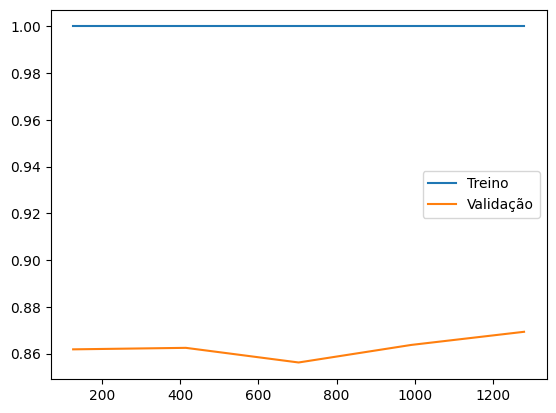

In [39]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

X = df.drop(columns=['target'])
y = df['target']
train_sizes, train_scores, test_scores = learning_curve(model_lgm, X, y, cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Treino')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validação')
plt.legend()
plt.show()


### Do mesmo jeito que o teste de cima, a curva de aprendizado nos mostra que nossa validação está próxima ao treino com 0.87 isso é mais uma confirmação de não overfitting de nossos dados. 

In [55]:
df

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,ph,sulfitos,alcool,target
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,2
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,2
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,2
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,3
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4081,7.460685,0.358786,0.319419,2.018466,0.074485,16.757260,25.577810,0.994567,3.253351,0.719419,11.569918,5
4082,8.243256,0.365820,0.393055,2.040515,0.059241,13.176834,29.000000,0.995526,3.168215,0.772154,10.996139,5
4083,7.729226,0.478521,0.326338,2.260916,0.075317,11.073933,19.390837,0.992978,3.213662,0.713169,12.519368,5
4084,8.128720,0.523680,0.157238,2.240233,0.067690,35.195346,49.333130,0.994221,3.388279,0.723564,12.565524,5


In [92]:
colunas = ['acidez_fixa', 'acidez_volatil', 'acido_citrico', 'acucar_residual',
       'cloretos', 'dioxido_enxofre_livre', 'dioxido_enxofre_total',
       'densidade', 'ph', 'sulfitos', 'alcool', 'target']

### **Modelo de Regressão**

In [ ]:
# Base Line de regressão
results_lrr = pipeline_regression(
    data_path=df_reg,
    target_column='qualidade',
    model_name='linear_regression',
    custom_params=None,
    scale_type='standard',
    test_size=0.2,
    return_data=True,
    save=None
)

Iniciando pipeline de regressão com modelo: linear_regression
Modelo linear_regression criado com sucesso!
Métricas:
  MAE: 0.6247
  MSE: 0.6506
  R2: 0.8333
  RMSE: 0.8066
  MAPE: 13.1927
✅ Modelo salvo em: ../models_storage\linear_regression_model.pkl
✅ Modelo salvo em: ../models_storage\linear_regression_scaler.pkl


In [ ]:
# Random Forest
results_rfr = pipeline_regression(
    data_path=df_reg,
    target_column='qualidade',
    model_name='random_forest',
    custom_params=None,
    scale_type='standard',
    test_size=0.2,
    return_data=True,
    save=None
)

Iniciando pipeline de regressão com modelo: random_forest
Modelo random_forest criado com sucesso!
Métricas:
  MAE: 0.1359
  MSE: 0.1095
  R2: 0.9719
  RMSE: 0.3309
  MAPE: 2.7775
✅ Modelo salvo em: ../models_storage\random_forest_model.pkl
✅ Modelo salvo em: ../models_storage\random_forest_scaler.pkl


In [ ]:
# XGBoost
results_xgbr = pipeline_regression(
    data_path=df_reg,
    target_column='qualidade',
    model_name='xgboost',
    custom_params=None,
    scale_type='standard',
    test_size=0.2,
    return_data=True,
    save=None
)

Iniciando pipeline de regressão com modelo: xgboost
Modelo xgboost criado com sucesso!
Métricas:
  MAE: 0.1442
  MSE: 0.1038
  R2: 0.9734
  RMSE: 0.3222
  MAPE: 2.9829
✅ Modelo salvo em: ../models_storage\xgboost_model.pkl
✅ Modelo salvo em: ../models_storage\xgboost_scaler.pkl


In [ ]:
# Lightgbm
results_lgmr = pipeline_regression(
    data_path=df_reg,
    target_column='qualidade',
    model_name='lightgbm',
    custom_params=None,
    scale_type='standard',
    test_size=0.2,
    return_data=True,
    save=None
)

Iniciando pipeline de regressão com modelo: lightgbm
Modelo lightgbm criado com sucesso!
Métricas:
  MAE: 0.1449
  MSE: 0.0862
  R2: 0.9779
  RMSE: 0.2936
  MAPE: 3.0663
✅ Modelo salvo em: ../models_storage\lightgbm_model.pkl
✅ Modelo salvo em: ../models_storage\lightgbm_scaler.pkl


h:\Portifolios_e_anotacoes_Jackson\PORTIFÓLIOS\analise-qualidade-vinhos\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# catboost
results_catr = pipeline_regression(
    data_path=df_reg,
    target_column='qualidade',
    model_name='catboost',
    custom_params=None,
    scale_type='standard',
    test_size=0.2,
    return_data=True,
    save=None
)

Iniciando pipeline de regressão com modelo: catboost
Modelo catboost criado com sucesso!
Métricas:
  MAE: 0.2369
  MSE: 0.1413
  R2: 0.9638
  RMSE: 0.3759
  MAPE: 4.9098
✅ Modelo salvo em: ../models_storage\catboost_model.pkl
✅ Modelo salvo em: ../models_storage\catboost_scaler.pkl


In [ ]:
# gradient_boosting
results_gbgr = pipeline_regression(
    data_path=df_reg,
    target_column='qualidade',
    model_name='gradient_boosting',
    custom_params=None,
    scale_type='standard',
    test_size=0.2,
    return_data=True,
    save=None
)

Iniciando pipeline de regressão com modelo: gradient_boosting
Modelo gradient_boosting criado com sucesso!
Métricas:
  MAE: 0.3069
  MSE: 0.2202
  R2: 0.9436
  RMSE: 0.4693
  MAPE: 6.3854
✅ Modelo salvo em: ../models_storage\gradient_boosting_model.pkl
✅ Modelo salvo em: ../models_storage\gradient_boosting_scaler.pkl


In [ ]:
# extra_trees
results_etr = pipeline_regression(
    data_path=df_reg,
    target_column='qualidade',
    model_name='extra_trees',
    custom_params=None,
    scale_type='standard',
    test_size=0.2,
    return_data=True,
    save=None
)

Iniciando pipeline de regressão com modelo: extra_trees
Modelo extra_trees criado com sucesso!
Métricas:
  MAE: 0.0823
  MSE: 0.0556
  R2: 0.9857
  RMSE: 0.2359
  MAPE: 1.6377
✅ Modelo salvo em: ../models_storage\extra_trees_model.pkl
✅ Modelo salvo em: ../models_storage\extra_trees_scaler.pkl
